In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [327]:
!pip install feature-engine

In [328]:
from feature_engine.encoding import OneHotEncoder as fe_OneHotEncoder

In [2]:
df = pd.read_csv('/Users/youssefalyakoob/Desktop/Kickstarter Project/Data/Kickstarter20_21_Consolidated.csv')

In [16]:
pd.set_option('display.max_columns', 40) 

In [17]:
df.head()

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_exchange_rate,usd_pledged,usd_type
0,5,Create 200 frames as animated asymmetric tesse...,"{""id"":20,""name"":""Conceptual Art"",""analytics_na...",169,GB,the United Kingdom,1403384155,"{""id"":496915283,""name"":""Dr Judith Duquemin"",""i...",GBP,£,False,USD,1406314998,False,NaN,1.382858,2000.0,1837982762,NaN,False,NaN,1403722998,"{""id"":615702,""name"":""Paris"",""slug"":""paris-fr"",...",Animation Trigonometry,NaN,"{""key"":""assets/011/729/930/bc87a51df0f56e1f60d...",100.0,"{""id"":1078248,""project_id"":1078248,""state"":""in...",animation-trigonometry,https://www.kickstarter.com/discover/categorie...,False,False,failed,1406314998,1.702087,"{""web"":{""project"":""https://www.kickstarter.com...",1.698889,170.20871,international
1,17,SixNip will be recording its debut album start...,"{""id"":43,""name"":""Rock"",""analytics_name"":""Rock""...",458,US,the United States,1526939522,"{""id"":1539002581,""name"":""SixNip"",""is_registere...",USD,$,True,USD,1530752392,False,NaN,1.000000,420.0,1820905478,NaN,False,NaN,1527728392,"{""id"":2457170,""name"":""Nashville"",""slug"":""nashv...",SixNip Debut EP,NaN,"{""key"":""assets/021/308/257/5f4170307eeaf72ca36...",458.0,"{""id"":3386782,""project_id"":3386782,""state"":""in...",sixnip-debut-ep,https://www.kickstarter.com/discover/categorie...,True,False,successful,1530752393,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,458.00000,international
2,15,A body of work exploring the boundaries of the...,"{""id"":20,""name"":""Conceptual Art"",""analytics_na...",1665,US,the United States,1328684260,"{""id"":1993850792,""name"":""Nathan Lomas"",""slug"":...",USD,$,True,USD,1333131673,False,NaN,1.000000,1600.0,132377102,NaN,False,NaN,1330975273,"{""id"":2482949,""name"":""Rochester"",""slug"":""roche...",[ The Soulless Machine ] - an MFA thesis exh...,NaN,"{""key"":""assets/011/316/520/ac5d98efb8f44037f2e...",1665.0,"{""id"":76549,""project_id"":76549,""state"":""inacti...",the-soulless-machine-an-mfa-thesis-exhibition,https://www.kickstarter.com/discover/categorie...,True,False,successful,1333131673,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,1665.00000,international
3,33,Natural Organic Handmade Soap with Unique Design,"{""id"":345,""name"":""DIY"",""analytics_name"":""DIY"",...",3262,US,the United States,1611176237,"{""id"":1052671844,""name"":""Kybele"",""slug"":""kybel...",USD,$,True,USD,1614247200,False,NaN,1.000000,3000.0,1922095391,NaN,False,NaN,1612909726,"{""id"":638242,""name"":""Berlin"",""slug"":""berlin-be...",KYBELE II | Organic Handmade Soap,NaN,"{""key"":""assets/032/233/135/dbfb9ea93c78e9b1436...",3262.0,"{""id"":4147527,""project_id"":4147527,""state"":""ac...",kybele-ii-organic-handmade-soap,https://www.kickstarter.com/discover/categorie...,True,False,successful,1614247200,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,3262.00000,international
4,21,Celebrating 25 years of Everette Hartsoe's RAZ...,"{""id"":252,""name"":""Graphic Novels"",""analytics_n...",2529,US,the United States,1448833828,"{""id"":1823553610,""name"":""Everette Hartsoe"",""sl...",USD,$,True,USD,1450227566,False,NaN,1.000000,1.0,935985181,NaN,False,NaN,1449190766,"{""id"":2436704,""name"":""Las Vegas"",""slug"":""las-v...",RAZOR COMPENDIUM vol.3 -25 ANNIVERSARY sign/no...,NaN,"{""key"":""assets/012/320/205/2ec1db2d85f5d6d5aa4...",2529.0,"{""id"":2253265,""project_id"":2253265,""state"":""ac...",razor-omnibus-collection-25-anniversary,https://www.kickstarter.com/discover/categorie...,True,False,successful,1450227567,

In [4]:
df.shape

(248321, 40)

In [5]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248321 entries, 0 to 248320
Data columns (total 39 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             248321 non-null  int64  
 1   blurb                     248311 non-null  object 
 2   category                  248321 non-null  object 
 3   converted_pledged_amount  248321 non-null  int64  
 4   country                   248321 non-null  object 
 5   country_displayable_name  248321 non-null  object 
 6   created_at                248321 non-null  int64  
 7   creator                   248321 non-null  object 
 8   currency                  248321 non-null  object 
 9   currency_symbol           248321 non-null  object 
 10  currency_trailing_code    248321 non-null  bool   
 11  current_currency          248321 non-null  object 
 12  deadline                  248321 non-null  int64  
 13  disable_communication     248321 non-null  b

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
backers_count,248321.0,1.588201e+02,9.327606e+02,0.000000e+00,4.000000e+00,3.000000e+01,9.700000e+01,1.058570e+05
converted_pledged_amount,248321.0,1.477032e+04,1.123301e+05,0.000000e+00,1.300000e+02,1.728000e+03,7.176000e+03,1.296961e+07
created_at,248321.0,1.485167e+09,7.970801e+07,1.240366e+09,1.425359e+09,1.485814e+09,1.556339e+09,1.628725e+09
deadline,248321.0,1.492332e+09,7.957902e+07,1.242468e+09,1.431811e+09,1.492570e+09,1.563546e+09,1.633901e+09
fx_rate,248321.0,1.002206e+00,2.377922e-01,9.038150e-03,1.000000e+00,1.000000e+00,1.000000e+00,1.884031e+00
goal,248321.0,5.184022e+04,1.217961e+06,1.000000e-02,1.500000e+03,5.000000e+03,1.500000e+04,1.000000e+08
id,248321.0,1.073147e+09,6.192765e+08,1.852000e+04,5.363789e+08,1.073857e+09,1.609654e+09,2.147476e+09
launched_at,248321.0,1.489472e+09,7.957580e+07,1.240674e+09,1.428980e+09,1.489791e+09,1.560519e+09,1.628738e+09
pledged,248321.0,3.172079e+04,1.546055e+06,0.000000e+00,1.370000e+02,1.802000e+03,7.789000e+03,4.816218e+08
state_changed_at,248321.0,1.492176e+09,7.946994e+07,1.242468e+09,1.431717e+09,1.492454e+09,1.563478e+09,1.628738e+09


In [11]:
df.isnull().sum()

backers_count                    0
blurb                           10
category                         0
converted_pledged_amount         0
country                          0
country_displayable_name         0
created_at                       0
creator                          0
currency                         0
currency_symbol                  0
currency_trailing_code           0
current_currency                 0
deadline                         0
disable_communication            0
friends                     248201
fx_rate                          0
goal                             0
id                               0
is_backing                  248201
is_starrable                     0
is_starred                  248201
launched_at                      0
location                       261
name                             0
permissions                 248201
photo                            0
pledged                          0
profile                          0
slug                

In [12]:
df.head(100).T.duplicated()

backers_count               False
blurb                       False
category                    False
converted_pledged_amount    False
country                     False
country_displayable_name    False
created_at                  False
creator                     False
currency                    False
currency_symbol             False
currency_trailing_code      False
current_currency            False
deadline                    False
disable_communication       False
friends                     False
fx_rate                     False
goal                        False
id                          False
is_backing                   True
is_starrable                 True
is_starred                   True
launched_at                 False
location                    False
name                        False
permissions                  True
photo                       False
pledged                     False
profile                     False
slug                        False
source_url    

<AxesSubplot:xlabel='state', ylabel='count'>

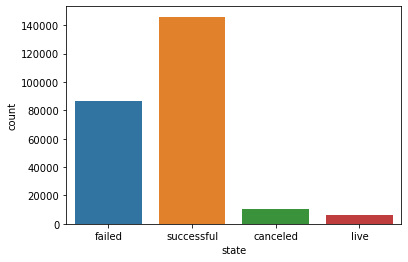

In [9]:
sns.countplot(x = 'state', data = df)

In [10]:
df.corr()

,backers_count,converted_pledged_amount,created_at,currency_trailing_code,deadline,disable_communication,fx_rate,goal,id,is_starrable,launched_at,pledged,spotlight,staff_pick,state_changed_at,static_usd_rate,usd_exchange_rate,usd_pledged
backers_count,1.000000,0.781561,0.056394,0.007816,0.060829,NaN,-0.004428,0.026569,0.000276,-0.007520,0.060790,0.217907,0.126610,0.162253,0.061117,-0.007002,0.000386,0.781813
converted_pledged_amount,0.781561,1.000000,0.049916,0.008683,0.053742,NaN,-0.006068,0.023301,-0.000740,-0.002967,0.053505,0.211268,0.096674,0.139993,0.053945,-0.007787,-0.002799,0.999964
created_at,0.056394,0.049916,1.000000,-0.168868,0.987848,NaN,-0.053657,0.004282,-0.003273,0.230124,0.987976,0.016076,0.040996,-0.008620,0.987815,-0.117035,-0.115763,0.049805
currency_trailing_code,0.007816,0.008683,-0.168868,1.000000,-0.165683,NaN,-0.566878,-0.005430,0.006426,-0.039400,-0.165606,-0.013357,0.019403,0.003339,-0.165630,-0.531723,-0.499969,0.008826
deadline,0.060829,0.053742,0.987848,-0.165683,1.000000,NaN,-0.053901,0.004895,-0.002680,0.233576,0.999911,0.016567,0.043749,-0.002253,0.999962,-0.118024,-0.117173,0.053634
disable_communication,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fx_rate,-0.004428,-0.006068,-0.053657,-0.566878,-0.053901,NaN,1.000000,-0.046289,-0.004478,-0.022380,-0.053441,-0.046007,0.018777,0.002385,-0.053805,0.971993,0.981701,-0.006122
goal,0.026569,0.023301,0.004282,-0.005430,0.004895,NaN,-0.046289,1.000000,0.001299,0.001900,0.004492,0.149814,-0.035857,-0.003702,0.004751,-0.044867,-0.069793,0.023265
id,0.000276,-0.000740,-0.003273,0.006426,-0.002680,NaN,-0.004478,0.001299,1.000000,-0.001071,-0.002695,0.002357,0.000970,0.001089,-0.002674,-0.003801,-0.001899,-0.000747
is_starrable,-0.007520,-0.002967,0.230124,-0.039400,0.233576,NaN,-0.022380,0.001900,-0.001071,1.000000,0.232469,0.001395,-0.184709,-0.018216,0.227517,-0.026614,-0.059517,-0.003060


<AxesSubplot:>

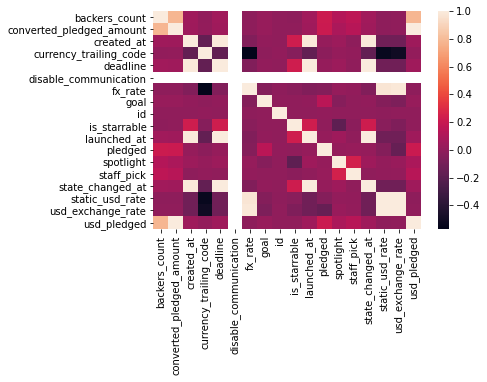

In [13]:
sns.heatmap(df.corr())

In [14]:
df['state'].value_counts() #drop canceled, live classes

successful    145998
failed         86314
canceled       10156
live            5853
Name: state, dtype: int64

In [18]:
df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'country_displayable_name', 'created_at', 'creator',
       'currency', 'currency_symbol', 'currency_trailing_code',
       'current_currency', 'deadline', 'disable_communication', 'friends',
       'fx_rate', 'goal', 'id', 'is_backing', 'is_starrable', 'is_starred',
       'launched_at', 'location', 'name', 'permissions', 'photo', 'pledged',
       'profile', 'slug', 'source_url', 'spotlight', 'staff_pick', 'state',
       'state_changed_at', 'static_usd_rate', 'urls', 'usd_exchange_rate',
       'usd_pledged', 'usd_type'],
      dtype='object')

In [24]:
df.source_url

0         https://www.kickstarter.com/discover/categorie...
1         https://www.kickstarter.com/discover/categorie...
2         https://www.kickstarter.com/discover/categorie...
3         https://www.kickstarter.com/discover/categorie...
4         https://www.kickstarter.com/discover/categorie...
                                ...                        
248316    https://www.kickstarter.com/discover/categorie...
248317    https://www.kickstarter.com/discover/categorie...
248318    https://www.kickstarter.com/discover/categorie...
248319    https://www.kickstarter.com/discover/categorie...
248320    https://www.kickstarter.com/discover/categorie...
Name: source_url, Length: 248321, dtype: object

In [25]:
df.usd_type.value_counts()

domestic         217121
international     31116
Name: usd_type, dtype: int64

In [229]:
def wrangle(df):
    #removing features with > 50% of observatins missing
    observation_threshold = len(df)/2
    df = df.dropna(thresh=observation_threshold , axis = 1)
    #removing redundant/unnecessary columns 
    df.drop(columns='converted_pledged_amount', inplace = True) #redundant with usd_pledged
    df.drop(columns='creator', inplace = True) #high cardinality/not beneficial for class seperability
    df.drop(columns='currency', inplace=True)#will use usd pledged for all
    df.drop(columns='currency_symbol', inplace=True)
    df.drop(columns='currency_trailing_code', inplace=True)
    df.drop(columns='current_currency', inplace = True)
    df.drop(columns='fx_rate', inplace=True) #redundant with static_usd_rate
    df.drop(columns='photo', inplace=True) #will not be using photos for prediction
    df.drop(columns='pledged', inplace=True) #Has different currency values/not standardized
    df.drop(columns='profile', inplace=True) #user info 
    df.drop(columns='slug', inplace=True) #high cardinality/redundant with name column
    df.drop(columns='source_url', inplace=True) #url of each project
    df.drop(columns='state_changed_at', inplace=True) #high correlation with deadline
    df.drop(columns='urls', inplace=True) #more url data
    df.drop(columns='usd_type', inplace=True) #redundant as all campaigns will be in usd
    
    # Target Leakage
    df.drop(columns='spotlight', inplace=True) #target leakage--leaks info about project success beforehand
    df.drop(columns='staff_pick', inplace=True) #we don't know if a project will be a staff pick
    df.drop(columns='usd_pledged', inplace=True) #nothing has been pledged yet 
    df.drop(columns='backers_count', inplace=True) # leaks info about future, we do not know how many backers a campaign will have
    
    #remove observations with canceled/live as target class
    class_to_drop1 = df[df['state'] == 'canceled'].index
    class_to_drop2 = df[df['state'] == 'live'].index
    df.drop(class_to_drop1, inplace=True)
    df.drop(class_to_drop2, inplace=True)
    
    #remove null observations for blurb feature, location
    df.dropna(subset=['blurb'], inplace=True)
    df.dropna(subset=['location'], inplace=True)
    
    #remove columns with only 1 unique value/won't aid in class seperability
    df.drop(columns='is_starrable', inplace=True)
    df.drop(columns='disable_communication', inplace=True)
    
    #drop duplicated campaigns
    df.drop_duplicates('id',inplace=True)
    
    #set id column as index 
    df.set_index('id',inplace=True)
    df.reset_index(drop=True,inplace=True)
    
    #convert unix time features to datetime object
    cols = ['created_at', 'deadline', 'launched_at']
    for col in cols:
        df[col] = pd.to_datetime(df[col], origin='unix', unit='s')
        
    ##goal feature needs to be standardized to usd. It is in local currency of campaign country
    #new feature for goal in usd
    df['goal_usd'] = round(df['goal'] * df['static_usd_rate'],2) 
    #drop goal feature with different currencies & conversion rate feature
    df.drop(columns='goal', inplace=True)
    df.drop(columns='static_usd_rate',inplace=True)
    
    #remove location and country_displayable_name features/redundant with country
    df.drop(columns='location', inplace=True)
    df.drop(columns='country_displayable_name', inplace=True)
    
    #dropping name column due to high cardinality 
    df.drop(columns='name', inplace=True)
    
    
    
    
    
    
    return df
    
    
    
    
    
    
    
    
    
    
    

In [147]:
df1.head()

,backers_count,blurb,category,country,country_displayable_name,created_at,deadline,goal,launched_at,location,name,spotlight,state,static_usd_rate,usd_pledged
id,,,,,,,,,,,,,,,
1837982762,5,Create 200 frames as animated asymmetric tesse...,"{""id"":20,""name"":""Conceptual Art"",""analytics_na...",GB,the United Kingdom,2014-06-21 20:55:55,2014-07-25 19:03:18,2000.0,2014-06-25 19:03:18,"{""id"":615702,""name"":""Paris"",""slug"":""paris-fr"",...",Animation Trigonometry,False,failed,1.702087,170.20871
1820905478,17,SixNip will be recording its debut album start...,"{""id"":43,""name"":""Rock"",""analytics_name"":""Rock""...",US,the United States,2018-05-21 21:52:02,2018-07-05 00:59:52,420.0,2018-05-31 00:59:52,"{""id"":2457170,""name"":""Nashville"",""slug"":""nashv...",SixNip Debut EP,True,successful,1.000000,458.00000
132377102,15,A body of work exploring the boundaries of the...,"{""id"":20,""name"":""Conceptual Art"",""analytics_na...",US,the United States,2012-02-08 06:57:40,2012-03-30 18:21:13,1600.0,2012-03-05 19:21:13,"{""id"":2482949,""name"":""Rochester"",""slug"":""roche...",[ The Soulless Machine ] - an MFA thesis exh...,True,successful,1.000000,1665.00000
1922095391,33,Natural Organic Handmade Soap with Unique Design,"{""id"":345,""name"":""DIY"",""analytics_name"":""DIY"",...",US,the United States,2021-01-20 20:57:17,2021-02-25 10:00:00,3000.0,2021-02-09 22:28:46,"{""id"":638242,""name"":""Berlin"",""slug"":""berlin-be...",KYBELE II | Organic Handmade Soap,True,successful,1.000000,3262.00000
935985181,21,Celebrating 25 years of Everette Hartsoe's RAZ...,"{""id"":252,""name"":""Graphic Novels"",""analytics_n...",US,the United States,2015-11-29 21:50:28,2015-12-16 00:59:26,1.0,2015-12-04 00:59:26,"{""id"":2436704,""name"":""Las Vegas"",""slug"":""las-v...",RAZOR COMPENDIUM vol.3 -25 ANNIVERSARY sign/no...,True,successful,1.000000,2529.00000


In [153]:
df1.head()

,backers_count,blurb,category,country,country_displayable_name,created_at,deadline,goal,launched_at,location,name,spotlight,state,static_usd_rate,usd_pledged
0,5,Create 200 frames as animated asymmetric tesse...,"{""id"":20,""name"":""Conceptual Art"",""analytics_na...",GB,the United Kingdom,2014-06-21 20:55:55,2014-07-25 19:03:18,2000.0,2014-06-25 19:03:18,"{""id"":615702,""name"":""Paris"",""slug"":""paris-fr"",...",Animation Trigonometry,False,failed,1.702087,170.20871
1,17,SixNip will be recording its debut album start...,"{""id"":43,""name"":""Rock"",""analytics_name"":""Rock""...",US,the United States,2018-05-21 21:52:02,2018-07-05 00:59:52,420.0,2018-05-31 00:59:52,"{""id"":2457170,""name"":""Nashville"",""slug"":""nashv...",SixNip Debut EP,True,successful,1.000000,458.00000
2,15,A body of work exploring the boundaries of the...,"{""id"":20,""name"":""Conceptual Art"",""analytics_na...",US,the United States,2012-02-08 06:57:40,2012-03-30 18:21:13,1600.0,2012-03-05 19:21:13,"{""id"":2482949,""name"":""Rochester"",""slug"":""roche...",[ The Soulless Machine ] - an MFA thesis exh...,True,successful,1.000000,1665.00000
3,33,Natural Organic Handmade Soap with Unique Design,"{""id"":345,""name"":""DIY"",""analytics_name"":""DIY"",...",US,the United States,2021-01-20 20:57:17,2021-02-25 10:00:00,3000.0,2021-02-09 22:28:46,"{""id"":638242,""name"":""Berlin"",""slug"":""berlin-be...",KYBELE II | Organic Handmade Soap,True,successful,1.000000,3262.00000
4,21,Celebrating 25 years of Everette Hartsoe's RAZ...,"{""id"":252,""name"":""Graphic Novels"",""analytics_n...",US,the United States,2015-11-29 21:50:28,2015-12-16 00:59:26,1.0,2015-12-04 00:59:26,"{""id"":2436704,""name"":""Las Vegas"",""slug"":""las-v...",RAZOR COMPENDIUM vol.3 -25 ANNIVERSARY sign/no...,True,successful,1.000000,2529.00000


In [154]:
df1.shape

(183674, 15)

In [230]:
df1 = wrangle(df)

/Users/youssefalyakoob/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-229-aa1089722bde>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['blurb'], inplace=True)
<ipython-input-229-aa1089722bde>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['location'], inplace=True)
/Users/youssefalyakoob/opt/

In [85]:
df1.columns

Index(['backers_count', 'blurb', 'category', 'country',
       'country_displayable_name', 'created_at', 'deadline',
       'disable_communication', 'goal', 'launched_at', 'location', 'name',
       'spotlight', 'state', 'static_usd_rate', 'usd_pledged'],
      dtype='object')

In [47]:
df1.isnull().sum()

backers_count               0
blurb                       0
category                    0
country                     0
country_displayable_name    0
created_at                  0
deadline                    0
disable_communication       0
goal                        0
id                          0
launched_at                 0
location                    0
name                        0
slug                        0
spotlight                   0
state                       0
static_usd_rate             0
usd_pledged                 0
dtype: int64

In [48]:
df1.shape

(232057, 18)

In [40]:
df1.head(10000).T.duplicated()

backers_count               False
blurb                       False
category                    False
country                     False
country_displayable_name    False
created_at                  False
deadline                    False
disable_communication       False
goal                        False
id                          False
is_starrable                 True
launched_at                 False
location                    False
name                        False
slug                        False
spotlight                   False
state                       False
static_usd_rate             False
usd_pledged                 False
dtype: bool

In [42]:
df1.is_starrable.value_counts()

False    232057
Name: is_starrable, dtype: int64

In [43]:
df1.shape

(232057, 19)

<AxesSubplot:xlabel='is_starrable', ylabel='count'>

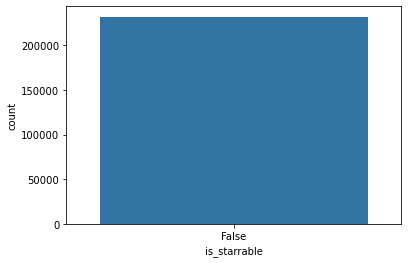

In [44]:
sns.countplot(x='is_starrable', data=df1) #remove is_starrable feature-- has only one value

In [61]:
# Checking for duplicated campaigns sorted by identifier id 
df1[df1.duplicated(subset='id')]
#48383 duplicated campaigns

,backers_count,blurb,category,country,country_displayable_name,created_at,deadline,disable_communication,goal,id,launched_at,location,name,slug,spotlight,state,static_usd_rate,usd_pledged
1434,28,Amor y Canela will be the finest cooking schoo...,"{""id"":308,""name"":""Events"",""analytics_name"":""Ev...",US,the United States,1486871882,1527299849,False,9000.0,244230022,1524880649,"{""id"":150484,""name"":""Valladolid"",""slug"":""valla...",Chef Contos Cooking School - Amor y Canela - Y...,chef-contos-cooking-school-amor-y-canela-yucatan,True,successful,1.000000,9215.000000
2195,7,"PREVIEW OF CLAIRE pop-up @ Taste Kitchen, PAST...","{""id"":308,""name"":""Events"",""analytics_name"":""Ev...",HK,Hong Kong,1524901189,1526197200,False,500.0,955057936,1524908942,"{""id"":2165352,""name"":""Hong Kong"",""slug"":""hong-...",CLAIRE PASTRY DEMO @ PMQ TASTE KITCHEN,claire-pastry-demo-pmq-taste-kitchen,True,successful,0.127418,115.950007
3406,10,David needs to volunteer at the Dujianyang Pan...,"{""id"":308,""name"":""Events"",""analytics_name"":""Ev...",US,the United States,1529969980,1531863374,False,600.0,31039291,1530048974,"{""id"":2158433,""name"":""Chengdu"",""slug"":""chengdu...",Giant Panda Adventure for David!,giant-panda-adventure-for-david,True,successful,1.000000,816.000000
3888,29,"We are a small, sustainable farm that hopes to...","{""id"":305,""name"":""Community Gardens"",""analytic...",US,the United States,1513977953,1520266642,False,5854.0,1739357917,1517674642,"{""id"":2441116,""name"":""Logan"",""slug"":""logan-ut""...",Little Bean Community Garden,little-bean-community-garden,True,successful,1.000000,5855.000000
4220,220,A cookbook with a mission to support the peopl...,"{""id"":306,""name"":""Cookbooks"",""analytics_name"":...",US,the United States,1524322386,1532311200,False,36000.0,703504858,1529058549,"{""id"":2459115,""name"":""New York"",""slug"":""new-yo...",Tchad: Cooking for Conservation,tchad-cooking-for-conservation,True,successful,1.000000,39881.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248315,138,Six rare comedies on DVD - from one of the mos...,"{""id"":292,""name"":""Comedy"",""analytics_name"":""Co...",GB,the United Kingdom,1499344048,1501165887,False,3000.0,1556695188,1499351487,"{""id"":12602176,""name"":""Surrey"",""slug"":""surrey-...",Lloyd Hamilton - silent comedian,lloyd-hamilton-silent-comedian,True,successful,1.293271,5276.546659
248317,1,A Short Comedic Film: Batman returns home to f...,"{""id"":292,""name"":""Comedy"",""analytics_name"":""Co...",US,the United States,1531765407,1533441600,False,3000.0,272433153,1531774641,"{""id"":2451822,""name"":""Milwaukee"",""slug"":""milwa...",Batman: Fig Newton,batman-fig-newton,False,failed,1.000000,1.000000
248318,61,An Alternative R&B EP of 5 songs written and p...,"{""id"":322,""name"":""R&B"",""analytics_name"":""R&B"",...",US,the United States,1554935071,1558272258,False,4000.0,496562213,1555680258,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los...",MAYA DAWN - EP DEBUT FUNDRAISER,maya-dawn-ep-debut,True,successful,1.000000,4116.000000
248319,1,"Sean McGee is an Sandusky,Ohio Native that cre...","{""id"":322,""name"":""R&B"",""analytics_name"":""R&B"",...",US,the United States,1490543162,1493143200,False,5000.0,1848258308,1490560927,"{""id"":2357024,""name"":""Atlanta"",""slug"":""atlanta...",Still Alive Tour For Sean McGee,still-alive-tour-for-sean-mcgee,False,failed,1.000000,1.000000


In [69]:
df1[df1.duplicated(subset='id')]

,backers_count,blurb,category,country,country_displayable_name,created_at,deadline,disable_communication,goal,id,launched_at,location,name,spotlight,state,static_usd_rate,usd_pledged
5528,1,A garden for the community to end hunger in my...,"{""id"":305,""name"":""Community Gardens"",""slug"":""f...",US,the United States,1442552946,1445299200,False,35000.0,1495355984,1442628731,"{""id"":2429159,""name"":""Jerome"",""slug"":""jerome-i...",Public Garden,False,failed,1.000000,1.000000
5532,56,Support the circus arts and help our aerial st...,"{""id"":286,""name"":""Spaces"",""slug"":""theater/spac...",GB,the United Kingdom,1454149309,1462100406,False,2400.0,1641172225,1456920006,"{""id"":10243,""name"":""Aberdeen"",""slug"":""aberdeen...",Higher Education,True,successful,1.394134,3529.948098
5654,58,Here comes White Center's #1 Pro Wrestling the...,"{""id"":307,""name"":""Drinks"",""slug"":""food/drinks""...",US,the United States,1566365713,1569898800,False,8000.0,278884144,1567384885,"{""id"":2490383,""name"":""Seattle"",""slug"":""seattle...",Lariat Bar RAT City's #1 Wrestling themed bar ...,True,successful,1.000000,15059.000000
5698,42,I've been selling Beef Jerky on EBay for some ...,"{""id"":313,""name"":""Small Batch"",""slug"":""food/sm...",US,the United States,1513821391,1517202000,False,1000.0,1175034545,1514500611,"{""id"":2459115,""name"":""New York"",""slug"":""new-yo...",Schmitt's Homemade Countryside Beef Jerky Sticks,True,successful,1.000000,1264.000000
5835,119,Full-color recipe cards with ten delicious dis...,"{""id"":306,""name"":""Cookbooks"",""slug"":""food/cook...",US,the United States,1546543472,1550631600,False,400.0,1063487254,1548688087,"{""id"":12589335,""name"":""Brooklyn"",""slug"":""brook...",de·lec·ta·ble: Ten Recipes from Around the World,True,successful,1.000000,1939.230000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248315,138,Six rare comedies on DVD - from one of the mos...,"{""id"":292,""name"":""Comedy"",""analytics_name"":""Co...",GB,the United Kingdom,1499344048,1501165887,False,3000.0,1556695188,1499351487,"{""id"":12602176,""name"":""Surrey"",""slug"":""surrey-...",Lloyd Hamilton - silent comedian,True,successful,1.293271,5276.546659
248317,1,A Short Comedic Film: Batman returns home to f...,"{""id"":292,""name"":""Comedy"",""analytics_name"":""Co...",US,the United States,1531765407,1533441600,False,3000.0,272433153,1531774641,"{""id"":2451822,""name"":""Milwaukee"",""slug"":""milwa...",Batman: Fig Newton,False,failed,1.000000,1.000000
248318,61,An Alternative R&B EP of 5 songs written and p...,"{""id"":322,""name"":""R&B"",""analytics_name"":""R&B"",...",US,the United States,1554935071,1558272258,False,4000.0,496562213,1555680258,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los...",MAYA DAWN - EP DEBUT FUNDRAISER,True,successful,1.000000,4116.000000
248319,1,"Sean McGee is an Sandusky,Ohio Native that cre...","{""id"":322,""name"":""R&B"",""analytics_name"":""R&B"",...",US,the United States,1490543162,1493143200,False,5000.0,1848258308,1490560927,"{""id"":2357024,""name"":""Atlanta"",""slug"":""atlanta...",Still Alive Tour For Sean McGee,False,failed,1.000000,1.000000


In [51]:
df1.head()

,backers_count,blurb,category,country,country_displayable_name,created_at,deadline,disable_communication,goal,id,launched_at,location,name,slug,spotlight,state,static_usd_rate,usd_pledged
0,5,Create 200 frames as animated asymmetric tesse...,"{""id"":20,""name"":""Conceptual Art"",""analytics_na...",GB,the United Kingdom,1403384155,1406314998,False,2000.0,1837982762,1403722998,"{""id"":615702,""name"":""Paris"",""slug"":""paris-fr"",...",Animation Trigonometry,animation-trigonometry,False,failed,1.702087,170.20871
1,17,SixNip will be recording its debut album start...,"{""id"":43,""name"":""Rock"",""analytics_name"":""Rock""...",US,the United States,1526939522,1530752392,False,420.0,1820905478,1527728392,"{""id"":2457170,""name"":""Nashville"",""slug"":""nashv...",SixNip Debut EP,sixnip-debut-ep,True,successful,1.000000,458.00000
2,15,A body of work exploring the boundaries of the...,"{""id"":20,""name"":""Conceptual Art"",""analytics_na...",US,the United States,1328684260,1333131673,False,1600.0,132377102,1330975273,"{""id"":2482949,""name"":""Rochester"",""slug"":""roche...",[ The Soulless Machine ] - an MFA thesis exh...,the-soulless-machine-an-mfa-thesis-exhibition,True,successful,1.000000,1665.00000
3,33,Natural Organic Handmade Soap with Unique Design,"{""id"":345,""name"":""DIY"",""analytics_name"":""DIY"",...",US,the United States,1611176237,1614247200,False,3000.0,1922095391,1612909726,"{""id"":638242,""name"":""Berlin"",""slug"":""berlin-be...",KYBELE II | Organic Handmade Soap,kybele-ii-organic-handmade-soap,True,successful,1.000000,3262.00000
4,21,Celebrating 25 years of Everette Hartsoe's RAZ...,"{""id"":252,""name"":""Graphic Novels"",""analytics_n...",US,the United States,1448833828,1450227566,False,1.0,935985181,1449190766,"{""id"":2436704,""name"":""Las Vegas"",""slug"":""las-v...",RAZOR COMPENDIUM vol.3 -25 ANNIVERSARY sign/no...,razor-omnibus-collection-25-anniversary,True,successful,1.000000,2529.00000


In [52]:
#df1.set_index('id',inplace=True) #remove existing index and set id as idenbtifier index

In [53]:
df1.head()

,backers_count,blurb,category,country,country_displayable_name,created_at,deadline,disable_communication,goal,launched_at,location,name,slug,spotlight,state,static_usd_rate,usd_pledged
id,,,,,,,,,,,,,,,,,
1837982762,5,Create 200 frames as animated asymmetric tesse...,"{""id"":20,""name"":""Conceptual Art"",""analytics_na...",GB,the United Kingdom,1403384155,1406314998,False,2000.0,1403722998,"{""id"":615702,""name"":""Paris"",""slug"":""paris-fr"",...",Animation Trigonometry,animation-trigonometry,False,failed,1.702087,170.20871
1820905478,17,SixNip will be recording its debut album start...,"{""id"":43,""name"":""Rock"",""analytics_name"":""Rock""...",US,the United States,1526939522,1530752392,False,420.0,1527728392,"{""id"":2457170,""name"":""Nashville"",""slug"":""nashv...",SixNip Debut EP,sixnip-debut-ep,True,successful,1.000000,458.00000
132377102,15,A body of work exploring the boundaries of the...,"{""id"":20,""name"":""Conceptual Art"",""analytics_na...",US,the United States,1328684260,1333131673,False,1600.0,1330975273,"{""id"":2482949,""name"":""Rochester"",""slug"":""roche...",[ The Soulless Machine ] - an MFA thesis exh...,the-soulless-machine-an-mfa-thesis-exhibition,True,successful,1.000000,1665.00000
1922095391,33,Natural Organic Handmade Soap with Unique Design,"{""id"":345,""name"":""DIY"",""analytics_name"":""DIY"",...",US,the United States,1611176237,1614247200,False,3000.0,1612909726,"{""id"":638242,""name"":""Berlin"",""slug"":""berlin-be...",KYBELE II | Organic Handmade Soap,kybele-ii-organic-handmade-soap,True,successful,1.000000,3262.00000
935985181,21,Celebrating 25 years of Everette Hartsoe's RAZ...,"{""id"":252,""name"":""Graphic Novels"",""analytics_n...",US,the United States,1448833828,1450227566,False,1.0,1449190766,"{""id"":2436704,""name"":""Las Vegas"",""slug"":""las-v...",RAZOR COMPENDIUM vol.3 -25 ANNIVERSARY sign/no...,razor-omnibus-collection-25-anniversary,True,successful,1.000000,2529.00000


In [168]:
#df1[df1['id'] == 0]

In [83]:
df1.isnull().sum()

backers_count               0
blurb                       0
category                    0
country                     0
country_displayable_name    0
created_at                  0
deadline                    0
disable_communication       0
goal                        0
launched_at                 0
location                    0
name                        0
spotlight                   0
state                       0
static_usd_rate             0
usd_pledged                 0
dtype: int64

In [86]:
df1.columns

Index(['backers_count', 'blurb', 'category', 'country',
       'country_displayable_name', 'created_at', 'deadline',
       'disable_communication', 'goal', 'launched_at', 'location', 'name',
       'spotlight', 'state', 'static_usd_rate', 'usd_pledged'],
      dtype='object')

In [88]:
df1.head()

,backers_count,blurb,category,country,country_displayable_name,created_at,deadline,disable_communication,goal,launched_at,location,name,spotlight,state,static_usd_rate,usd_pledged
id,,,,,,,,,,,,,,,,
1837982762,5,Create 200 frames as animated asymmetric tesse...,"{""id"":20,""name"":""Conceptual Art"",""analytics_na...",GB,the United Kingdom,1403384155,1406314998,False,2000.0,1403722998,"{""id"":615702,""name"":""Paris"",""slug"":""paris-fr"",...",Animation Trigonometry,False,failed,1.702087,170.20871
1820905478,17,SixNip will be recording its debut album start...,"{""id"":43,""name"":""Rock"",""analytics_name"":""Rock""...",US,the United States,1526939522,1530752392,False,420.0,1527728392,"{""id"":2457170,""name"":""Nashville"",""slug"":""nashv...",SixNip Debut EP,True,successful,1.000000,458.00000
132377102,15,A body of work exploring the boundaries of the...,"{""id"":20,""name"":""Conceptual Art"",""analytics_na...",US,the United States,1328684260,1333131673,False,1600.0,1330975273,"{""id"":2482949,""name"":""Rochester"",""slug"":""roche...",[ The Soulless Machine ] - an MFA thesis exh...,True,successful,1.000000,1665.00000
1922095391,33,Natural Organic Handmade Soap with Unique Design,"{""id"":345,""name"":""DIY"",""analytics_name"":""DIY"",...",US,the United States,1611176237,1614247200,False,3000.0,1612909726,"{""id"":638242,""name"":""Berlin"",""slug"":""berlin-be...",KYBELE II | Organic Handmade Soap,True,successful,1.000000,3262.00000
935985181,21,Celebrating 25 years of Everette Hartsoe's RAZ...,"{""id"":252,""name"":""Graphic Novels"",""analytics_n...",US,the United States,1448833828,1450227566,False,1.0,1449190766,"{""id"":2436704,""name"":""Las Vegas"",""slug"":""las-v...",RAZOR COMPENDIUM vol.3 -25 ANNIVERSARY sign/no...,True,successful,1.000000,2529.00000


In [100]:
df1.head()

,backers_count,blurb,category,country,country_displayable_name,created_at,deadline,disable_communication,goal,launched_at,location,name,spotlight,state,static_usd_rate,usd_pledged
id,,,,,,,,,,,,,,,,
1837982762,5,Create 200 frames as animated asymmetric tesse...,"{""id"":20,""name"":""Conceptual Art"",""analytics_na...",GB,the United Kingdom,2014-06-21 20:55:55,2014-07-25 19:03:18,False,2000.0,2014-06-25 19:03:18,"{""id"":615702,""name"":""Paris"",""slug"":""paris-fr"",...",Animation Trigonometry,False,failed,1.702087,170.20871
1820905478,17,SixNip will be recording its debut album start...,"{""id"":43,""name"":""Rock"",""analytics_name"":""Rock""...",US,the United States,2018-05-21 21:52:02,2018-07-05 00:59:52,False,420.0,2018-05-31 00:59:52,"{""id"":2457170,""name"":""Nashville"",""slug"":""nashv...",SixNip Debut EP,True,successful,1.000000,458.00000
132377102,15,A body of work exploring the boundaries of the...,"{""id"":20,""name"":""Conceptual Art"",""analytics_na...",US,the United States,2012-02-08 06:57:40,2012-03-30 18:21:13,False,1600.0,2012-03-05 19:21:13,"{""id"":2482949,""name"":""Rochester"",""slug"":""roche...",[ The Soulless Machine ] - an MFA thesis exh...,True,successful,1.000000,1665.00000
1922095391,33,Natural Organic Handmade Soap with Unique Design,"{""id"":345,""name"":""DIY"",""analytics_name"":""DIY"",...",US,the United States,2021-01-20 20:57:17,2021-02-25 10:00:00,False,3000.0,2021-02-09 22:28:46,"{""id"":638242,""name"":""Berlin"",""slug"":""berlin-be...",KYBELE II | Organic Handmade Soap,True,successful,1.000000,3262.00000
935985181,21,Celebrating 25 years of Everette Hartsoe's RAZ...,"{""id"":252,""name"":""Graphic Novels"",""analytics_n...",US,the United States,2015-11-29 21:50:28,2015-12-16 00:59:26,False,1.0,2015-12-04 00:59:26,"{""id"":2436704,""name"":""Las Vegas"",""slug"":""las-v...",RAZOR COMPENDIUM vol.3 -25 ANNIVERSARY sign/no...,True,successful,1.000000,2529.00000


In [103]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183674 entries, 1837982762 to 2143331207
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   backers_count             183674 non-null  int64         
 1   blurb                     183674 non-null  object        
 2   category                  183674 non-null  object        
 3   country                   183674 non-null  object        
 4   country_displayable_name  183674 non-null  object        
 5   created_at                183674 non-null  datetime64[ns]
 6   deadline                  183674 non-null  datetime64[ns]
 7   disable_communication     183674 non-null  bool          
 8   goal                      183674 non-null  float64       
 9   launched_at               183674 non-null  datetime64[ns]
 10  location                  183674 non-null  object        
 11  name                      183674 non-null  object   

In [105]:
df1.iloc[0]['category']

'{"id":20,"name":"Conceptual Art","analytics_name":"Conceptual Art","slug":"art/conceptual art","position":2,"parent_id":1,"parent_name":"Art","color":16760235,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/art/conceptual%20art"}}}'

In [231]:

# creating subcategory feature from category dictionary
func = lambda x: x['category'].split('/')[1].split('","position')[0]
df1['sub_category'] = df1.apply(func, axis=1)

<ipython-input-231-2cc6726db611>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sub_category'] = df1.apply(func, axis=1)


In [133]:
df1.head()

,backers_count,blurb,category,country,country_displayable_name,created_at,deadline,disable_communication,goal,launched_at,location,name,spotlight,state,static_usd_rate,usd_pledged,sub_category
id,,,,,,,,,,,,,,,,,
1837982762,5,Create 200 frames as animated asymmetric tesse...,"{""id"":20,""name"":""Conceptual Art"",""analytics_na...",GB,the United Kingdom,2014-06-21 20:55:55,2014-07-25 19:03:18,False,2000.0,2014-06-25 19:03:18,"{""id"":615702,""name"":""Paris"",""slug"":""paris-fr"",...",Animation Trigonometry,False,failed,1.702087,170.20871,conceptual art
1820905478,17,SixNip will be recording its debut album start...,"{""id"":43,""name"":""Rock"",""analytics_name"":""Rock""...",US,the United States,2018-05-21 21:52:02,2018-07-05 00:59:52,False,420.0,2018-05-31 00:59:52,"{""id"":2457170,""name"":""Nashville"",""slug"":""nashv...",SixNip Debut EP,True,successful,1.000000,458.00000,rock
132377102,15,A body of work exploring the boundaries of the...,"{""id"":20,""name"":""Conceptual Art"",""analytics_na...",US,the United States,2012-02-08 06:57:40,2012-03-30 18:21:13,False,1600.0,2012-03-05 19:21:13,"{""id"":2482949,""name"":""Rochester"",""slug"":""roche...",[ The Soulless Machine ] - an MFA thesis exh...,True,successful,1.000000,1665.00000,conceptual art
1922095391,33,Natural Organic Handmade Soap with Unique Design,"{""id"":345,""name"":""DIY"",""analytics_name"":""DIY"",...",US,the United States,2021-01-20 20:57:17,2021-02-25 10:00:00,False,3000.0,2021-02-09 22:28:46,"{""id"":638242,""name"":""Berlin"",""slug"":""berlin-be...",KYBELE II | Organic Handmade Soap,True,successful,1.000000,3262.00000,diy
935985181,21,Celebrating 25 years of Everette Hartsoe's RAZ...,"{""id"":252,""name"":""Graphic Novels"",""analytics_n...",US,the United States,2015-11-29 21:50:28,2015-12-16 00:59:26,False,1.0,2015-12-04 00:59:26,"{""id"":2436704,""name"":""Las Vegas"",""slug"":""las-v...",RAZOR COMPENDIUM vol.3 -25 ANNIVERSARY sign/no...,True,successful,1.000000,2529.00000,graphic novels


In [123]:
df1.head()

,backers_count,blurb,category,country,country_displayable_name,created_at,deadline,disable_communication,goal,launched_at,location,name,spotlight,state,static_usd_rate,usd_pledged,sub_category
id,,,,,,,,,,,,,,,,,
1837982762,5,Create 200 frames as animated asymmetric tesse...,"{""id"":20,""name"":""Conceptual Art"",""analytics_na...",GB,the United Kingdom,2014-06-21 20:55:55,2014-07-25 19:03:18,False,2000.0,2014-06-25 19:03:18,"{""id"":615702,""name"":""Paris"",""slug"":""paris-fr"",...",Animation Trigonometry,False,failed,1.702087,170.20871,conceptual art
1820905478,17,SixNip will be recording its debut album start...,"{""id"":43,""name"":""Rock"",""analytics_name"":""Rock""...",US,the United States,2018-05-21 21:52:02,2018-07-05 00:59:52,False,420.0,2018-05-31 00:59:52,"{""id"":2457170,""name"":""Nashville"",""slug"":""nashv...",SixNip Debut EP,True,successful,1.000000,458.00000,rock
132377102,15,A body of work exploring the boundaries of the...,"{""id"":20,""name"":""Conceptual Art"",""analytics_na...",US,the United States,2012-02-08 06:57:40,2012-03-30 18:21:13,False,1600.0,2012-03-05 19:21:13,"{""id"":2482949,""name"":""Rochester"",""slug"":""roche...",[ The Soulless Machine ] - an MFA thesis exh...,True,successful,1.000000,1665.00000,conceptual art
1922095391,33,Natural Organic Handmade Soap with Unique Design,"{""id"":345,""name"":""DIY"",""analytics_name"":""DIY"",...",US,the United States,2021-01-20 20:57:17,2021-02-25 10:00:00,False,3000.0,2021-02-09 22:28:46,"{""id"":638242,""name"":""Berlin"",""slug"":""berlin-be...",KYBELE II | Organic Handmade Soap,True,successful,1.000000,3262.00000,diy
935985181,21,Celebrating 25 years of Everette Hartsoe's RAZ...,"{""id"":252,""name"":""Graphic Novels"",""analytics_n...",US,the United States,2015-11-29 21:50:28,2015-12-16 00:59:26,False,1.0,2015-12-04 00:59:26,"{""id"":2436704,""name"":""Las Vegas"",""slug"":""las-v...",RAZOR COMPENDIUM vol.3 -25 ANNIVERSARY sign/no...,True,successful,1.000000,2529.00000,graphic novels


In [240]:
#clean up category feature
func2 = lambda x: x['category'].split('"slug":"')[1].split('/')[0]
df1['category'] = df1.apply(func2, axis =1)
func3 = f = lambda x: x['category'].split('","position"')[0] #cleaning up categories with no sub categories
df1['category'] = df1.apply(func3, axis =1)

<ipython-input-240-b4b17b49bbd7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['category'] = df1.apply(func2, axis =1)
<ipython-input-240-b4b17b49bbd7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['category'] = df1.apply(func3, axis =1)


In [233]:
df1.head()

,blurb,category,country,created_at,deadline,launched_at,state,goal_usd,sub_category,category_new
0,Create 200 frames as animated asymmetric tesse...,"{""id"":20,""name"":""Conceptual Art"",""analytics_na...",GB,2014-06-21 20:55:55,2014-07-25 19:03:18,2014-06-25 19:03:18,failed,3404.17,conceptual art,art
1,SixNip will be recording its debut album start...,"{""id"":43,""name"":""Rock"",""analytics_name"":""Rock""...",US,2018-05-21 21:52:02,2018-07-05 00:59:52,2018-05-31 00:59:52,successful,420.00,rock,music
2,A body of work exploring the boundaries of the...,"{""id"":20,""name"":""Conceptual Art"",""analytics_na...",US,2012-02-08 06:57:40,2012-03-30 18:21:13,2012-03-05 19:21:13,successful,1600.00,conceptual art,art
3,Natural Organic Handmade Soap with Unique Design,"{""id"":345,""name"":""DIY"",""analytics_name"":""DIY"",...",US,2021-01-20 20:57:17,2021-02-25 10:00:00,2021-02-09 22:28:46,successful,3000.00,diy,crafts
4,Celebrating 25 years of Everette Hartsoe's RAZ...,"{""id"":252,""name"":""Graphic Novels"",""analytics_n...",US,2015-11-29 21:50:28,2015-12-16 00:59:26,2015-12-04 00:59:26,successful,1.00,graphic novels,comics


In [138]:
df1.sub_category.nunique()

147

In [139]:
df1.isnull().sum()

backers_count               0
blurb                       0
category                    0
country                     0
country_displayable_name    0
created_at                  0
deadline                    0
disable_communication       0
goal                        0
launched_at                 0
location                    0
name                        0
spotlight                   0
state                       0
static_usd_rate             0
usd_pledged                 0
sub_category                0
dtype: int64

<AxesSubplot:xlabel='disable_communication', ylabel='count'>

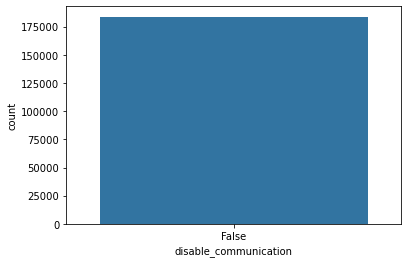

In [142]:
sns.countplot(x = 'disable_communication', data=df1)

In [143]:
df1.shape

(183674, 17)

In [144]:
df1.disable_communication.value_counts()

False    183674
Name: disable_communication, dtype: int64

In [171]:
df1.head()

,backers_count,blurb,category,country,country_displayable_name,created_at,deadline,goal,launched_at,location,name,state,static_usd_rate,sub_category
0,5,Create 200 frames as animated asymmetric tesse...,art,GB,the United Kingdom,2014-06-21 20:55:55,2014-07-25 19:03:18,2000.0,2014-06-25 19:03:18,"{""id"":615702,""name"":""Paris"",""slug"":""paris-fr"",...",Animation Trigonometry,failed,1.702087,conceptual art
1,17,SixNip will be recording its debut album start...,music,US,the United States,2018-05-21 21:52:02,2018-07-05 00:59:52,420.0,2018-05-31 00:59:52,"{""id"":2457170,""name"":""Nashville"",""slug"":""nashv...",SixNip Debut EP,successful,1.000000,rock
2,15,A body of work exploring the boundaries of the...,art,US,the United States,2012-02-08 06:57:40,2012-03-30 18:21:13,1600.0,2012-03-05 19:21:13,"{""id"":2482949,""name"":""Rochester"",""slug"":""roche...",[ The Soulless Machine ] - an MFA thesis exh...,successful,1.000000,conceptual art
3,33,Natural Organic Handmade Soap with Unique Design,crafts,US,the United States,2021-01-20 20:57:17,2021-02-25 10:00:00,3000.0,2021-02-09 22:28:46,"{""id"":638242,""name"":""Berlin"",""slug"":""berlin-be...",KYBELE II | Organic Handmade Soap,successful,1.000000,diy
4,21,Celebrating 25 years of Everette Hartsoe's RAZ...,comics,US,the United States,2015-11-29 21:50:28,2015-12-16 00:59:26,1.0,2015-12-04 00:59:26,"{""id"":2436704,""name"":""Las Vegas"",""slug"":""las-v...",RAZOR COMPENDIUM vol.3 -25 ANNIVERSARY sign/no...,successful,1.000000,graphic novels


In [173]:
# #goal feature needs to be standardized to usd. It is in local currency of campaign country
# #new feature for goal in usd
# df1['goal_usd'] = round(df1['goal'] * df1['static_usd_rate'],2) 

<ipython-input-173-710b18264875>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['goal_usd'] = round(df1['goal'] * df1['static_usd_rate'],2)


In [184]:
df1.head()

,blurb,category,country,created_at,deadline,launched_at,state,goal_usd,sub_category
0,Create 200 frames as animated asymmetric tesse...,art,GB,2014-06-21 20:55:55,2014-07-25 19:03:18,2014-06-25 19:03:18,failed,3404.17,conceptual art
1,SixNip will be recording its debut album start...,music,US,2018-05-21 21:52:02,2018-07-05 00:59:52,2018-05-31 00:59:52,successful,420.00,rock
2,A body of work exploring the boundaries of the...,art,US,2012-02-08 06:57:40,2012-03-30 18:21:13,2012-03-05 19:21:13,successful,1600.00,conceptual art
3,Natural Organic Handmade Soap with Unique Design,crafts,US,2021-01-20 20:57:17,2021-02-25 10:00:00,2021-02-09 22:28:46,successful,3000.00,diy
4,Celebrating 25 years of Everette Hartsoe's RAZ...,comics,US,2015-11-29 21:50:28,2015-12-16 00:59:26,2015-12-04 00:59:26,successful,1.00,graphic novels


In [187]:
df1.launched_at.dt.month_name()

0             June
1              May
2            March
3         February
4         December
            ...   
183669        July
183670         May
183671         May
183672       April
183673       March
Name: launched_at, Length: 183674, dtype: object

In [189]:
df1.launched_at.dt.year


0         2014
1         2018
2         2012
3         2021
4         2015
          ... 
183669    2021
183670    2021
183671    2021
183672    2021
183673    2021
Name: launched_at, Length: 183674, dtype: int64

<AxesSubplot:xlabel='state', ylabel='count'>

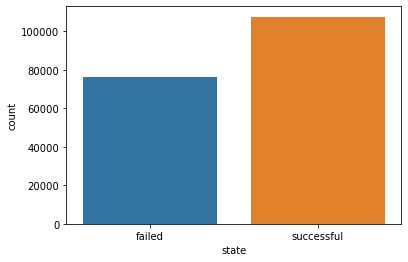

In [190]:
sns.countplot(x='state', data=df1)

In [195]:
df1.head(100).T.duplicated()

blurb           False
category        False
country         False
created_at      False
deadline        False
launched_at     False
state           False
goal_usd        False
sub_category    False
dtype: bool

In [196]:
df1.isnull().sum()

blurb           0
category        0
country         0
created_at      0
deadline        0
launched_at     0
state           0
goal_usd        0
sub_category    0
dtype: int64

In [201]:
df1.country.value_counts()

US    127335
GB     20636
CA      8518
AU      4284
DE      3318
FR      2683
MX      2635
IT      2328
ES      2054
NL      1602
SE      1332
HK      1269
DK       826
NZ       810
SG       725
CH       656
BE       565
IE       562
JP       531
AT       457
NO       437
LU        57
PL        25
GR        18
SI        11
Name: country, dtype: int64

In [203]:
df1.category.value_counts(normalize=True)

music                                                                           0.137597
film & video                                                                    0.137357
technology                                                                      0.102083
art                                                                             0.101647
publishing                                                                      0.100994
food                                                                            0.078089
games                                                                           0.061130
fashion                                                                         0.052833
design                                                                          0.040708
comics                                                                          0.038530
photography                                                                     0.031534
crafts               

In [204]:
df1.category.nunique()

28

In [205]:
df1.sub_category.nunique()

147

In [215]:
df1.state.value_counts(normalize=True)

successful    0.585989
failed        0.414011
Name: state, dtype: float64

In [224]:
df1.head()

,blurb,category,country,created_at,deadline,launched_at,state,goal_usd,sub_category
0,Create 200 frames as animated asymmetric tesse...,art,GB,2014-06-21 20:55:55,2014-07-25 19:03:18,2014-06-25 19:03:18,failed,3404.17,conceptual art
1,SixNip will be recording its debut album start...,music,US,2018-05-21 21:52:02,2018-07-05 00:59:52,2018-05-31 00:59:52,successful,420.00,rock
2,A body of work exploring the boundaries of the...,art,US,2012-02-08 06:57:40,2012-03-30 18:21:13,2012-03-05 19:21:13,successful,1600.00,conceptual art
3,Natural Organic Handmade Soap with Unique Design,crafts,US,2021-01-20 20:57:17,2021-02-25 10:00:00,2021-02-09 22:28:46,successful,3000.00,diy
4,Celebrating 25 years of Everette Hartsoe's RAZ...,comics,US,2015-11-29 21:50:28,2015-12-16 00:59:26,2015-12-04 00:59:26,successful,1.00,graphic novels


In [217]:
df1.country.value_counts(normalize = True)

US    0.693266
GB    0.112351
CA    0.046376
AU    0.023324
DE    0.018065
FR    0.014607
MX    0.014346
IT    0.012675
ES    0.011183
NL    0.008722
SE    0.007252
HK    0.006909
DK    0.004497
NZ    0.004410
SG    0.003947
CH    0.003572
BE    0.003076
IE    0.003060
JP    0.002891
AT    0.002488
NO    0.002379
LU    0.000310
PL    0.000136
GR    0.000098
SI    0.000060
Name: country, dtype: float64

In [220]:
df1.launched_at.dt.year.value_counts()

2015    30481
2016    23548
2017    22089
2020    21746
2014    21271
2019    20796
2018    20017
2013     9683
2012     6394
2011     3641
2021     2677
2010     1175
2009      156
Name: launched_at, dtype: int64

In [228]:
df1.category.value_counts()

music                                                                           25273
film & video                                                                    25229
technology                                                                      18750
art                                                                             18670
publishing                                                                      18550
food                                                                            14343
games                                                                           11228
fashion                                                                          9704
design                                                                           7477
comics                                                                           7077
photography                                                                      5792
crafts                                                

In [234]:
df1.category_new.nunique()

28

In [239]:
df1.category_new.value_counts()

music                                                                           25273
film & video                                                                    25229
technology                                                                      18750
art                                                                             18670
publishing                                                                      18550
food                                                                            14343
games                                                                           11228
fashion                                                                          9704
design                                                                           7477
comics                                                                           7077
photography                                                                      5792
crafts                                                

In [238]:
df1.sub_category.unique()

array(['conceptual art', 'rock', 'diy', 'graphic novels', 'events',
       'restaurants', 'poetry', 'pop', 'small batch', 'software', '',
       'farms', 'drinks', 'vegan', 'food trucks', "farmer's markets",
       'spaces', 'cookbooks', 'video', 'community gardens', 'bacon',
       'web', 'webcomics', 'fiction', 'sound', 'product design', 'comedy',
       'letterpress', 'plays', 'literary journals', 'photo', 'audio',
       'r&b', 'literary spaces', 'graphic design', 'print', 'toys',
       'punk', 'architecture', 'academic', 'gadgets', 'radio & podcasts',
       'webseries', 'zines', 'playing cards', 'musical', 'calendars',
       'diy electronics', 'mobile games', '3d printing', 'narrative film',
       'classical music', 'interactive design', 'immersive',
       'social practice', 'experimental', 'festivals', 'weaving',
       'art books', 'documentary', 'people', 'animation', 'typography',
       'jewelry', 'knitting', 'public art', 'shorts', 'flight',
       'footwear', 'antholog

In [242]:
df1.category.value_counts() #OHE

music           25979
film & video    25442
art             19583
technology      19064
publishing      18550
food            14946
games           11285
fashion          9831
design           7792
comics           7377
photography      6239
theater          5250
crafts           5109
journalism       4153
dance            3074
Name: category, dtype: int64

In [243]:
df1.head()

,blurb,category,country,created_at,deadline,launched_at,state,goal_usd,sub_category,category_new
0,Create 200 frames as animated asymmetric tesse...,art,GB,2014-06-21 20:55:55,2014-07-25 19:03:18,2014-06-25 19:03:18,failed,3404.17,conceptual art,art
1,SixNip will be recording its debut album start...,music,US,2018-05-21 21:52:02,2018-07-05 00:59:52,2018-05-31 00:59:52,successful,420.00,rock,music
2,A body of work exploring the boundaries of the...,art,US,2012-02-08 06:57:40,2012-03-30 18:21:13,2012-03-05 19:21:13,successful,1600.00,conceptual art,art
3,Natural Organic Handmade Soap with Unique Design,crafts,US,2021-01-20 20:57:17,2021-02-25 10:00:00,2021-02-09 22:28:46,successful,3000.00,diy,crafts
4,Celebrating 25 years of Everette Hartsoe's RAZ...,comics,US,2015-11-29 21:50:28,2015-12-16 00:59:26,2015-12-04 00:59:26,successful,1.00,graphic novels,comics


In [244]:
df1.drop(columns='category_new', inplace=True)

/Users/youssefalyakoob/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [245]:
df1.head()

,blurb,category,country,created_at,deadline,launched_at,state,goal_usd,sub_category
0,Create 200 frames as animated asymmetric tesse...,art,GB,2014-06-21 20:55:55,2014-07-25 19:03:18,2014-06-25 19:03:18,failed,3404.17,conceptual art
1,SixNip will be recording its debut album start...,music,US,2018-05-21 21:52:02,2018-07-05 00:59:52,2018-05-31 00:59:52,successful,420.00,rock
2,A body of work exploring the boundaries of the...,art,US,2012-02-08 06:57:40,2012-03-30 18:21:13,2012-03-05 19:21:13,successful,1600.00,conceptual art
3,Natural Organic Handmade Soap with Unique Design,crafts,US,2021-01-20 20:57:17,2021-02-25 10:00:00,2021-02-09 22:28:46,successful,3000.00,diy
4,Celebrating 25 years of Everette Hartsoe's RAZ...,comics,US,2015-11-29 21:50:28,2015-12-16 00:59:26,2015-12-04 00:59:26,successful,1.00,graphic novels


In [246]:
df1.category.value_counts()

music           25979
film & video    25442
art             19583
technology      19064
publishing      18550
food            14946
games           11285
fashion          9831
design           7792
comics           7377
photography      6239
theater          5250
crafts           5109
journalism       4153
dance            3074
Name: category, dtype: int64

In [252]:
df1.sub_category.value_counts(normalize=True)

                   0.036086
web                0.020444
product design     0.017302
comedy             0.016295
graphic novels     0.014466
                     ...   
quilts             0.000474
residencies        0.000457
social practice    0.000441
chiptune           0.000272
taxidermy          0.000054
Name: sub_category, Length: 147, dtype: float64

In [ ]:
df1.country.value_counts()

In [255]:
#creating new feature for campaign duration from launch to deadline in days
df1['campaign_duration_in_days'] = df1['deadline'] - df1['launched_at']
df1['campaign_duration_in_days'] = df1['campaign_duration_in_days'].dt.round('d').dt.days

<ipython-input-255-9a7f3d9ebdfa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['campaign_duration_in_days'] = df1['deadline'] - df1['launched_at']
<ipython-input-255-9a7f3d9ebdfa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['campaign_duration_in_days'] = df1['campaign_duration_in_days'].dt.round('d').dt.days


In [256]:
df1.head()

,blurb,category,country,created_at,deadline,launched_at,state,goal_usd,sub_category,campaign_duration_in_days
0,Create 200 frames as animated asymmetric tesse...,art,GB,2014-06-21 20:55:55,2014-07-25 19:03:18,2014-06-25 19:03:18,failed,3404.17,conceptual art,30
1,SixNip will be recording its debut album start...,music,US,2018-05-21 21:52:02,2018-07-05 00:59:52,2018-05-31 00:59:52,successful,420.00,rock,35
2,A body of work exploring the boundaries of the...,art,US,2012-02-08 06:57:40,2012-03-30 18:21:13,2012-03-05 19:21:13,successful,1600.00,conceptual art,25
3,Natural Organic Handmade Soap with Unique Design,crafts,US,2021-01-20 20:57:17,2021-02-25 10:00:00,2021-02-09 22:28:46,successful,3000.00,diy,15
4,Celebrating 25 years of Everette Hartsoe's RAZ...,comics,US,2015-11-29 21:50:28,2015-12-16 00:59:26,2015-12-04 00:59:26,successful,1.00,graphic novels,12


In [257]:
df1.isnull().sum()

blurb                        0
category                     0
country                      0
created_at                   0
deadline                     0
launched_at                  0
state                        0
goal_usd                     0
sub_category                 0
campaign_duration_in_days    0
dtype: int64

<AxesSubplot:xlabel='category', ylabel='count'>

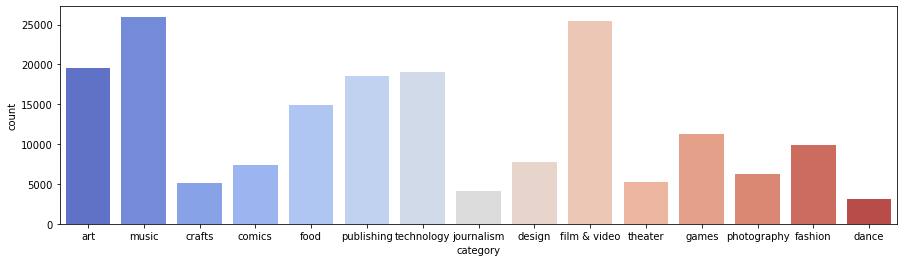

In [272]:
plt.figure(figsize=(15,4))
subgrade_order = sorted(df1['category'].unique())
sns.countplot(x='category',data=df1,palette='coolwarm' )

<AxesSubplot:xlabel='category', ylabel='count'>

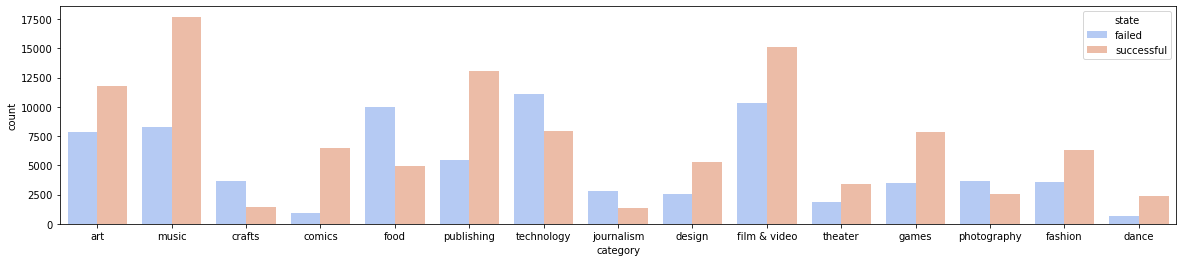

In [276]:
plt.figure(figsize=(20,4))
subgrade_order = sorted(df1['category'].unique())
sns.countplot(x='category',data=df1,palette='coolwarm' ,hue='state')
#looks like tech and food campaigns fail more than they succeed

<AxesSubplot:xlabel='sub_category', ylabel='count'>

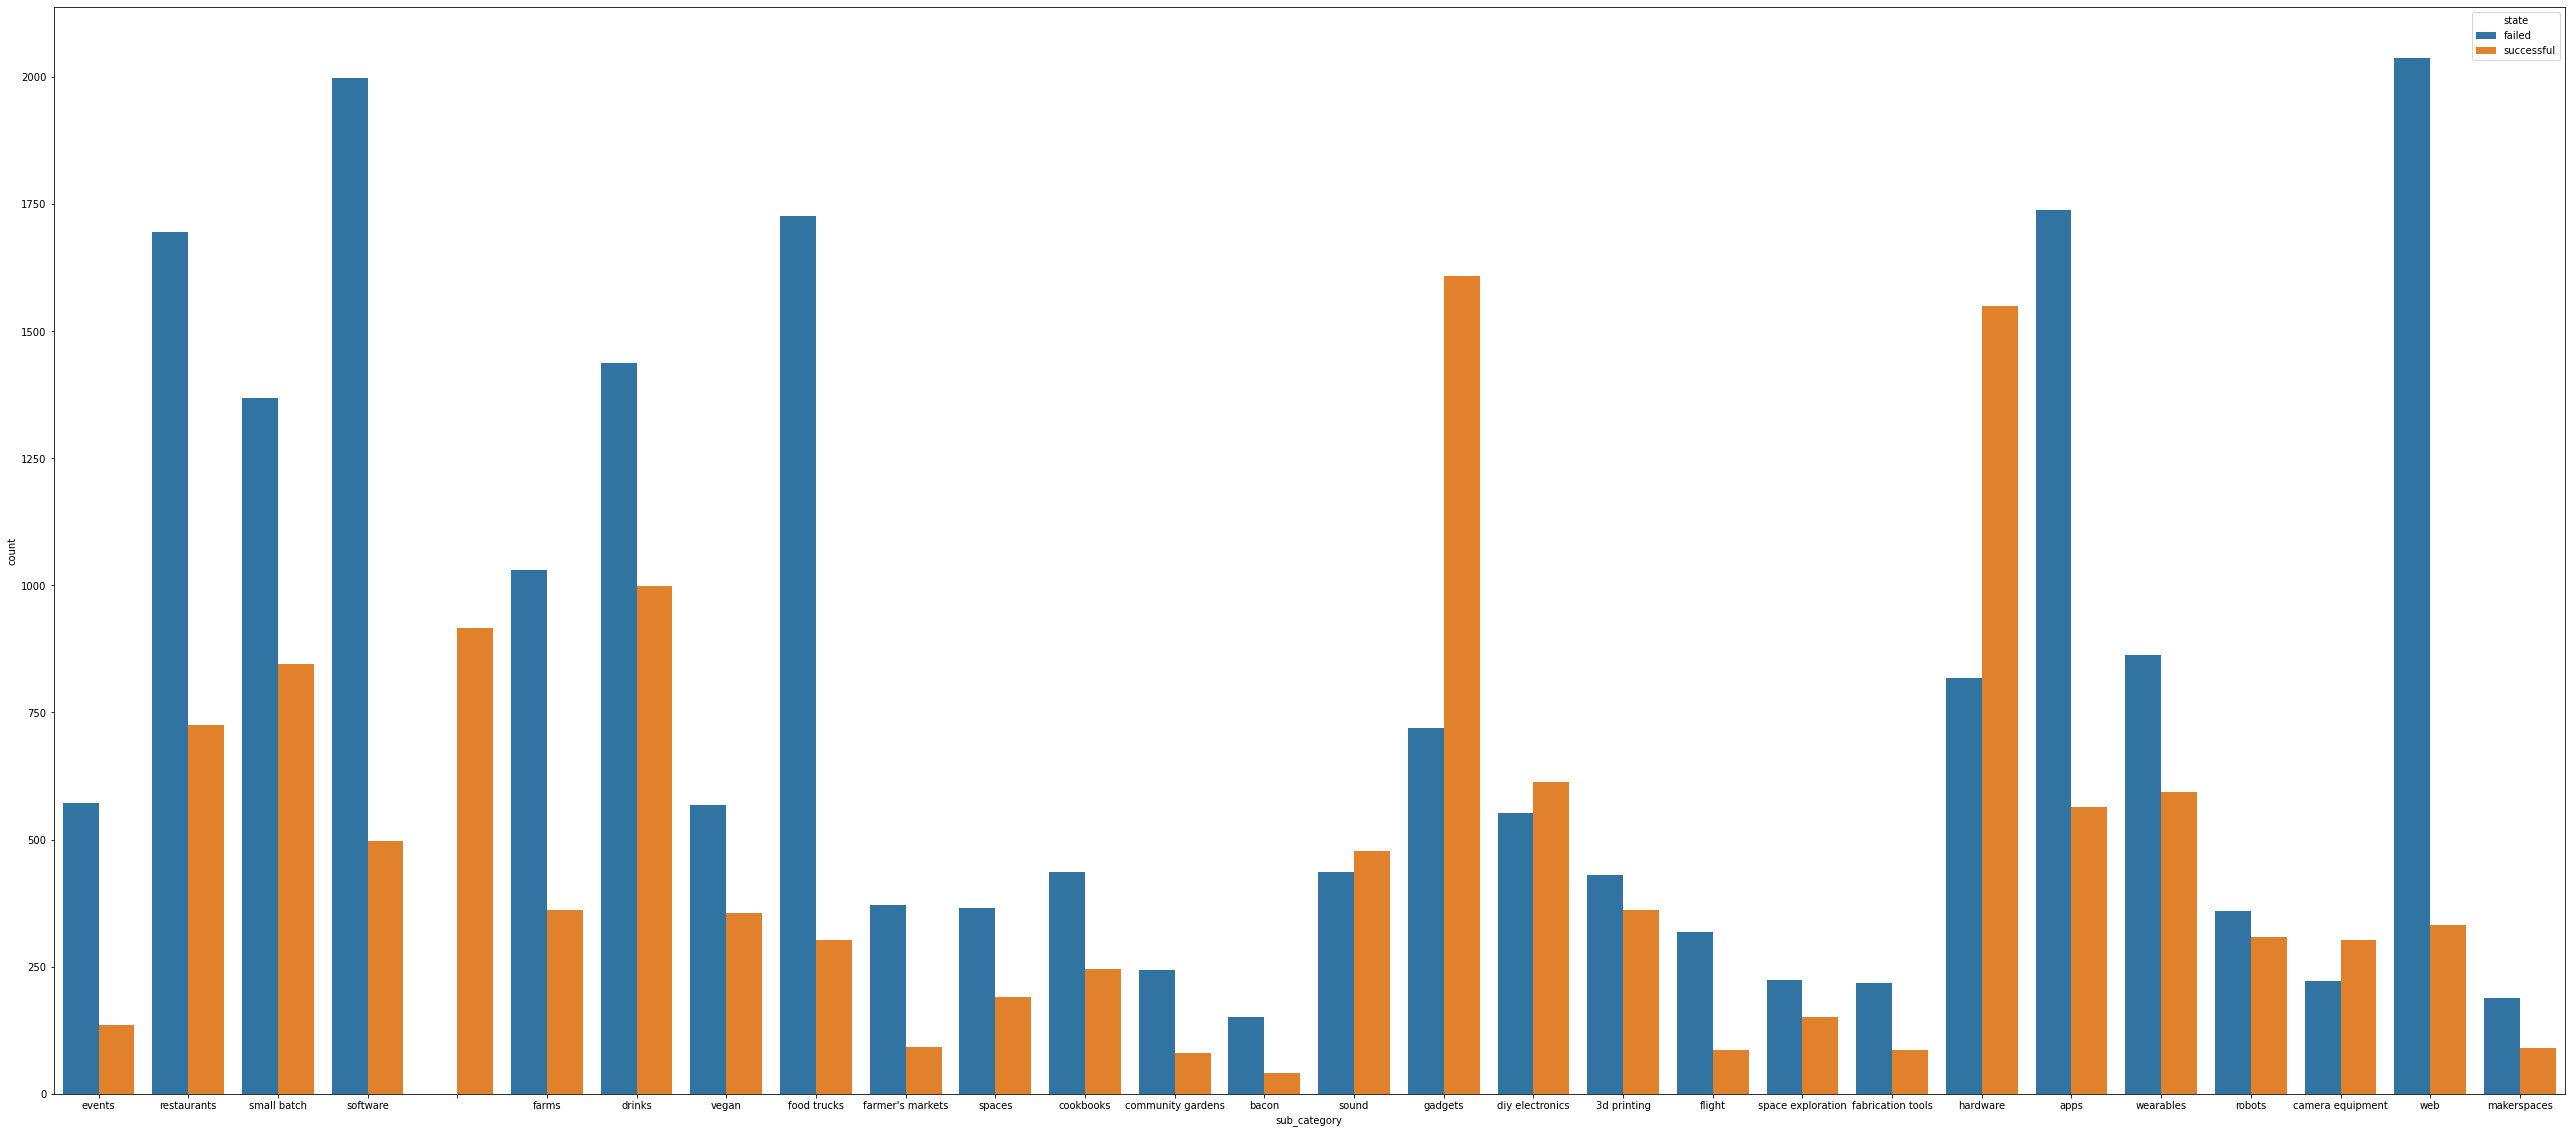

In [286]:
t_and_f = df1[(df1['category']=='technology') | (df1['category']=='food')]
#isolating technology and food category and breaking down by sub_category
plt.figure(figsize=(45,20))
subgrade_order = sorted(t_and_f['sub_category'].unique())
sns.countplot(x='sub_category',data=t_and_f, hue='state')

In [288]:
df1.campaign_duration_in_days.value_counts()

30    80251
60    16680
45     7191
31     6284
35     4485
      ...  
79        4
73        3
83        1
92        1
98        1
Name: campaign_duration_in_days, Length: 93, dtype: int64

<AxesSubplot:xlabel='campaign_duration_in_days', ylabel='count'>

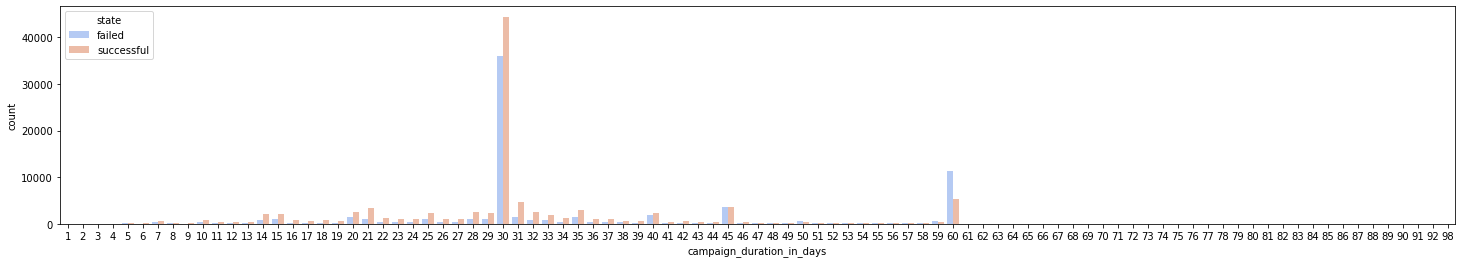

In [291]:
plt.figure(figsize=(25,4))
subgrade_order = sorted(df1['campaign_duration_in_days'])
sns.countplot(x='campaign_duration_in_days',data=df1,palette='coolwarm' ,hue='state')
#looks like tech and food campaigns fail more than they succeed

In [293]:
plt.figure(figsize=(25,4))
subgrade_order = sorted(df1['goal_usd'])
sns.countplot(x='goal_usd',data=df1,palette='coolwarm' ,hue='state')
#looks like tech and food campaigns fail more than they succeed

<AxesSubplot:xlabel='goal_usd', ylabel='count'>

Error in callback <function flush_figures at 0x7f93fc5143a0> (for post_execute):


KeyboardInterrupt: 

0.01

In [301]:
df1.head()

,blurb,category,country,created_at,deadline,launched_at,state,goal_usd,sub_category,campaign_duration_in_days
0,Create 200 frames as animated asymmetric tesse...,art,GB,2014-06-21 20:55:55,2014-07-25 19:03:18,2014-06-25 19:03:18,failed,3404.17,conceptual art,30
1,SixNip will be recording its debut album start...,music,US,2018-05-21 21:52:02,2018-07-05 00:59:52,2018-05-31 00:59:52,successful,420.00,rock,35
2,A body of work exploring the boundaries of the...,art,US,2012-02-08 06:57:40,2012-03-30 18:21:13,2012-03-05 19:21:13,successful,1600.00,conceptual art,25
3,Natural Organic Handmade Soap with Unique Design,crafts,US,2021-01-20 20:57:17,2021-02-25 10:00:00,2021-02-09 22:28:46,successful,3000.00,diy,15
4,Celebrating 25 years of Everette Hartsoe's RAZ...,comics,US,2015-11-29 21:50:28,2015-12-16 00:59:26,2015-12-04 00:59:26,successful,1.00,graphic novels,12


In [302]:
df1.to_csv('cleaned_data_v1.csv')

In [304]:
df1.head()

,blurb,category,country,created_at,deadline,launched_at,state,goal_usd,sub_category,campaign_duration_in_days
0,Create 200 frames as animated asymmetric tesse...,art,GB,2014-06-21 20:55:55,2014-07-25 19:03:18,2014-06-25 19:03:18,failed,3404.17,conceptual art,30
1,SixNip will be recording its debut album start...,music,US,2018-05-21 21:52:02,2018-07-05 00:59:52,2018-05-31 00:59:52,successful,420.00,rock,35
2,A body of work exploring the boundaries of the...,art,US,2012-02-08 06:57:40,2012-03-30 18:21:13,2012-03-05 19:21:13,successful,1600.00,conceptual art,25
3,Natural Organic Handmade Soap with Unique Design,crafts,US,2021-01-20 20:57:17,2021-02-25 10:00:00,2021-02-09 22:28:46,successful,3000.00,diy,15
4,Celebrating 25 years of Everette Hartsoe's RAZ...,comics,US,2015-11-29 21:50:28,2015-12-16 00:59:26,2015-12-04 00:59:26,successful,1.00,graphic novels,12


In [305]:
df1.shape

(183674, 10)

In [306]:
df1.head()

,blurb,category,country,created_at,deadline,launched_at,state,goal_usd,sub_category,campaign_duration_in_days
0,Create 200 frames as animated asymmetric tesse...,art,GB,2014-06-21 20:55:55,2014-07-25 19:03:18,2014-06-25 19:03:18,failed,3404.17,conceptual art,30
1,SixNip will be recording its debut album start...,music,US,2018-05-21 21:52:02,2018-07-05 00:59:52,2018-05-31 00:59:52,successful,420.00,rock,35
2,A body of work exploring the boundaries of the...,art,US,2012-02-08 06:57:40,2012-03-30 18:21:13,2012-03-05 19:21:13,successful,1600.00,conceptual art,25
3,Natural Organic Handmade Soap with Unique Design,crafts,US,2021-01-20 20:57:17,2021-02-25 10:00:00,2021-02-09 22:28:46,successful,3000.00,diy,15
4,Celebrating 25 years of Everette Hartsoe's RAZ...,comics,US,2015-11-29 21:50:28,2015-12-16 00:59:26,2015-12-04 00:59:26,successful,1.00,graphic novels,12


In [419]:
df2 = df1.copy()

In [308]:
df2.head()

,blurb,category,country,created_at,deadline,launched_at,state,goal_usd,sub_category,campaign_duration_in_days
0,Create 200 frames as animated asymmetric tesse...,art,GB,2014-06-21 20:55:55,2014-07-25 19:03:18,2014-06-25 19:03:18,failed,3404.17,conceptual art,30
1,SixNip will be recording its debut album start...,music,US,2018-05-21 21:52:02,2018-07-05 00:59:52,2018-05-31 00:59:52,successful,420.00,rock,35
2,A body of work exploring the boundaries of the...,art,US,2012-02-08 06:57:40,2012-03-30 18:21:13,2012-03-05 19:21:13,successful,1600.00,conceptual art,25
3,Natural Organic Handmade Soap with Unique Design,crafts,US,2021-01-20 20:57:17,2021-02-25 10:00:00,2021-02-09 22:28:46,successful,3000.00,diy,15
4,Celebrating 25 years of Everette Hartsoe's RAZ...,comics,US,2015-11-29 21:50:28,2015-12-16 00:59:26,2015-12-04 00:59:26,successful,1.00,graphic novels,12


In [420]:
# df2.drop(columns='blurb', inplace = True)
# df2.drop(columns='created_at', inplace=True)
# df2.drop(columns='deadline', inplace=True)

cols_to_drop = ['blurb', 'created_at', 'deadline', 'launched_at']
df2.drop(columns=cols_to_drop, inplace=True)


In [375]:
df2.head()

,category,country,state,goal_usd,sub_category,campaign_duration_in_days
0,art,GB,failed,3404.17,conceptual art,30
1,music,US,successful,420.00,rock,35
2,art,US,successful,1600.00,conceptual art,25
3,crafts,US,successful,3000.00,diy,15
4,comics,US,successful,1.00,graphic novels,12


In [314]:
df2.category.value_counts(normalize=True)

music           0.141441
film & video    0.138517
art             0.106618
technology      0.103793
publishing      0.100994
food            0.081372
games           0.061440
fashion         0.053524
design          0.042423
comics          0.040164
photography     0.033968
theater         0.028583
crafts          0.027816
journalism      0.022611
dance           0.016736
Name: category, dtype: float64

In [421]:
#binarizing target variable 
df2['success'] = df2['state'].map({'successful':1, 'failed':0})

In [324]:
df2.head()

,category,country,state,goal_usd,sub_category,campaign_duration_in_days,success
0,art,GB,failed,3404.17,conceptual art,30,0
1,music,US,successful,420.00,rock,35,1
2,art,US,successful,1600.00,conceptual art,25,1
3,crafts,US,successful,3000.00,diy,15,1
4,comics,US,successful,1.00,graphic novels,12,1


In [422]:
df2.drop(columns = 'state', inplace=True)

In [326]:
df2.head()

,category,country,goal_usd,sub_category,campaign_duration_in_days,success
0,art,GB,3404.17,conceptual art,30,0
1,music,US,420.00,rock,35,1
2,art,US,1600.00,conceptual art,25,1
3,crafts,US,3000.00,diy,15,1
4,comics,US,1.00,graphic novels,12,1


In [423]:
ohe_enc = fe_OneHotEncoder(
    top_categories=None,
    variables=['category'], drop_last=True) 



In [424]:
ohe_enc.fit(df2.fillna('Missing'))

OneHotEncoder(drop_last=True, variables=['category'])

In [331]:
df2.head()

,category,country,goal_usd,sub_category,campaign_duration_in_days,success
0,art,GB,3404.17,conceptual art,30,0
1,music,US,420.00,rock,35,1
2,art,US,1600.00,conceptual art,25,1
3,crafts,US,3000.00,diy,15,1
4,comics,US,1.00,graphic novels,12,1


In [425]:
df2 = ohe_enc.transform(df2.fillna('Missing'))

In [381]:
df2.head()

,country,goal_usd,sub_category,campaign_duration_in_days,success,category_art,category_music,category_crafts,category_comics,category_food,category_publishing,category_technology,category_journalism,category_design,category_film & video,category_theater,category_games,category_photography,category_fashion
0,GB,3404.17,conceptual art,30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,US,420.00,rock,35,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,US,1600.00,conceptual art,25,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,US,3000.00,diy,15,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,US,1.00,graphic novels,12,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [334]:
df2[df2['goal_usd'] <=5.00]

,country,goal_usd,sub_category,campaign_duration_in_days,success,category_art,category_music,category_crafts,category_comics,category_food,category_publishing,category_technology,category_journalism,category_design,category_film & video,category_theater,category_games,category_photography,category_fashion
4,US,1.00,graphic novels,12,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
368,IT,1.08,rock,30,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
616,US,1.00,conceptual art,30,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
704,US,1.00,graphic novels,10,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1041,GB,4.91,conceptual art,30,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177709,US,1.00,rock,60,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
178033,US,1.00,music videos,47,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
179072,US,5.00,mixed media,5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
181262,CH,1.13,product design,20,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [335]:
df2['sub_category'].value_counts(normalize=True)

                   0.036086
web                0.020444
product design     0.017302
comedy             0.016295
graphic novels     0.014466
                     ...   
quilts             0.000474
residencies        0.000457
social practice    0.000441
chiptune           0.000272
taxidermy          0.000054
Name: sub_category, Length: 147, dtype: float64

In [336]:
df2.sub_category.nunique()

147

<AxesSubplot:xlabel='sub_category', ylabel='Count'>

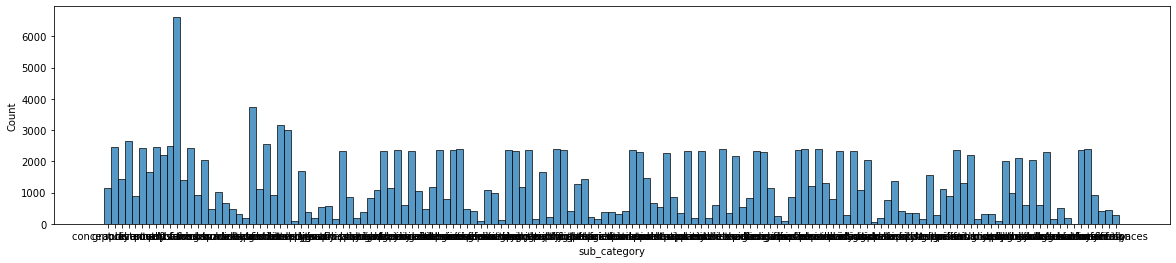

In [338]:
plt.figure(figsize=(20,4))
sns.histplot(x = 'sub_category', data = df2)

In [340]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183674 entries, 0 to 183673
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   country                    183674 non-null  object 
 1   goal_usd                   183674 non-null  float64
 2   sub_category               183674 non-null  object 
 3   campaign_duration_in_days  183674 non-null  int64  
 4   success                    183674 non-null  int64  
 5   category_art               183674 non-null  int64  
 6   category_music             183674 non-null  int64  
 7   category_crafts            183674 non-null  int64  
 8   category_comics            183674 non-null  int64  
 9   category_food              183674 non-null  int64  
 10  category_publishing        183674 non-null  int64  
 11  category_technology        183674 non-null  int64  
 12  category_journalism        183674 non-null  int64  
 13  category_design            18

In [341]:
df2.sub_category.unique()

array(['conceptual art', 'rock', 'diy', 'graphic novels', 'events',
       'restaurants', 'poetry', 'pop', 'small batch', 'software', '',
       'farms', 'drinks', 'vegan', 'food trucks', "farmer's markets",
       'spaces', 'cookbooks', 'video', 'community gardens', 'bacon',
       'web', 'webcomics', 'fiction', 'sound', 'product design', 'comedy',
       'letterpress', 'plays', 'literary journals', 'photo', 'audio',
       'r&b', 'literary spaces', 'graphic design', 'print', 'toys',
       'punk', 'architecture', 'academic', 'gadgets', 'radio & podcasts',
       'webseries', 'zines', 'playing cards', 'musical', 'calendars',
       'diy electronics', 'mobile games', '3d printing', 'narrative film',
       'classical music', 'interactive design', 'immersive',
       'social practice', 'experimental', 'festivals', 'weaving',
       'art books', 'documentary', 'people', 'animation', 'typography',
       'jewelry', 'knitting', 'public art', 'shorts', 'flight',
       'footwear', 'antholog

In [348]:
df2.sub_category.value_counts()

                   6628
web                3755
product design     3178
comedy             2993
graphic novels     2657
                   ... 
quilts               87
residencies          84
social practice      81
chiptune             50
taxidermy            10
Name: sub_category, Length: 147, dtype: int64

In [384]:
df2.sub_category.value_counts()

unlabeled    6628
Name: sub_category, dtype: int64

In [354]:
df2.head()

,country,goal_usd,sub_category,campaign_duration_in_days,success,category_art,category_music,category_crafts,category_comics,category_food,category_publishing,category_technology,category_journalism,category_design,category_film & video,category_theater,category_games,category_photography,category_fashion
0,GB,3404.17,None,30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,US,420.00,None,35,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,US,1600.00,None,25,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,US,3000.00,None,15,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,US,1.00,None,12,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [392]:
df2[df2['sub_category'] == '']

,country,goal_usd,sub_category,campaign_duration_in_days,success,category_art,category_music,category_crafts,category_comics,category_food,category_publishing,category_technology,category_journalism,category_design,category_film & video,category_theater,category_games,category_photography,category_fashion
52,GB,20039.65,,30,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
80,NL,17647.06,,30,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
92,US,10000.00,,34,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
109,US,500.00,,7,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
202,US,800.00,,20,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183590,US,2000.00,,17,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
183601,JP,9180.63,,45,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
183613,US,5000.00,,30,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
183632,CA,787.78,,30,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [396]:
df2.head()

,country,goal_usd,sub_category,campaign_duration_in_days,success,category_art,category_music,category_crafts,category_comics,category_food,category_publishing,category_technology,category_journalism,category_design,category_film & video,category_theater,category_games,category_photography,category_fashion
0,GB,3404.17,conceptual art,30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,US,420.00,rock,35,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,US,1600.00,conceptual art,25,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,US,3000.00,diy,15,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,US,1.00,graphic novels,12,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [398]:
df2.head()

,country,goal_usd,sub_category,campaign_duration_in_days,success,category_art,category_music,category_crafts,category_comics,category_food,category_publishing,category_technology,category_journalism,category_design,category_film & video,category_theater,category_games,category_photography,category_fashion,sub_category_new
0,GB,3404.17,conceptual art,30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1,US,420.00,rock,35,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN
2,US,1600.00,conceptual art,25,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
3,US,3000.00,diy,15,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,NaN
4,US,1.00,graphic novels,12,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,NaN


In [405]:
df2.drop(columns='sub_category_new', inplace=True)

In [427]:
df2.head()

,country,goal_usd,sub_category,campaign_duration_in_days,success,category_art,category_music,category_crafts,category_comics,category_food,category_publishing,category_technology,category_journalism,category_design,category_film & video,category_theater,category_games,category_photography,category_fashion
0,GB,3404.17,conceptual art,30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,US,420.00,rock,35,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,US,1600.00,conceptual art,25,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,US,3000.00,diy,15,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,US,1.00,graphic novels,12,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [406]:
df2.head()

,country,goal_usd,sub_category,campaign_duration_in_days,success,category_art,category_music,category_crafts,category_comics,category_food,category_publishing,category_technology,category_journalism,category_design,category_film & video,category_theater,category_games,category_photography,category_fashion
0,GB,3404.17,conceptual art,30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,US,420.00,rock,35,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,US,1600.00,conceptual art,25,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,US,3000.00,diy,15,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,US,1.00,graphic novels,12,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [428]:
df2 = df2.replace(r'^\s*$', 'unlabeled', regex=True)

In [429]:
df2.head()

,country,goal_usd,sub_category,campaign_duration_in_days,success,category_art,category_music,category_crafts,category_comics,category_food,category_publishing,category_technology,category_journalism,category_design,category_film & video,category_theater,category_games,category_photography,category_fashion
0,GB,3404.17,conceptual art,30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,US,420.00,rock,35,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,US,1600.00,conceptual art,25,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,US,3000.00,diy,15,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,US,1.00,graphic novels,12,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [430]:
df2.sub_category.value_counts(normalize = True, ascending = True)

taxidermy          0.000054
chiptune           0.000272
social practice    0.000441
residencies        0.000457
quilts             0.000474
                     ...   
graphic novels     0.014466
comedy             0.016295
product design     0.017302
web                0.020444
unlabeled          0.036086
Name: sub_category, Length: 147, dtype: float64

In [410]:
df2.head()

,country,goal_usd,sub_category,campaign_duration_in_days,success,category_art,category_music,category_crafts,category_comics,category_food,category_publishing,category_technology,category_journalism,category_design,category_film & video,category_theater,category_games,category_photography,category_fashion
0,GB,3404.17,conceptual art,30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,US,420.00,rock,35,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,US,1600.00,conceptual art,25,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,US,3000.00,diy,15,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,US,1.00,graphic novels,12,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [441]:
df2['sub_category'] = df2['sub_category'].mask(df2['sub_category'].map(df2['sub_category'].value_counts(normalize=True)) <=0.005, 'other')

In [442]:
df2.sub_category.value_counts(normalize = True)

other             0.160823
unlabeled         0.036086
web               0.020444
product design    0.017302
comedy            0.016295
                    ...   
musical           0.005766
spaces            0.005586
young adult       0.005428
festivals         0.005379
vegan             0.005031
Name: sub_category, Length: 77, dtype: float64

In [438]:
df2[df2['sub_category'] == 'other']

,country,goal_usd,sub_category,campaign_duration_in_days,success,category_art,category_music,category_crafts,category_comics,category_food,category_publishing,category_technology,category_journalism,category_design,category_film & video,category_theater,category_games,category_photography,category_fashion
488,US,9000.00,other,32,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
911,DE,835.84,other,30,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
982,AU,8334.03,other,30,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
983,US,15000.00,other,30,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1123,NZ,641.02,other,35,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183604,US,38000.00,other,60,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
183611,GB,6963.25,other,30,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
183614,CA,787.24,other,45,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
183630,DE,4242.17,other,36,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [439]:
df2['sub_category'].value_counts()

other             14437
unlabeled          6628
web                3755
product design     3178
comedy             2993
                  ...  
nature              607
childrenswear       597
installations       594
r&b                 585
candles             555
Name: sub_category, Length: 97, dtype: int64

In [443]:
df2.sub_category.nunique()

77

In [444]:
df3 = df2.copy()

In [445]:
df3.head()

,country,goal_usd,sub_category,campaign_duration_in_days,success,category_art,category_music,category_crafts,category_comics,category_food,category_publishing,category_technology,category_journalism,category_design,category_film & video,category_theater,category_games,category_photography,category_fashion
0,GB,3404.17,conceptual art,30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,US,420.00,rock,35,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,US,1600.00,conceptual art,25,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,US,3000.00,diy,15,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,US,1.00,graphic novels,12,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [446]:
df3.drop(columns = 'sub_category', inplace=True)

In [447]:
df3.head()

,country,goal_usd,campaign_duration_in_days,success,category_art,category_music,category_crafts,category_comics,category_food,category_publishing,category_technology,category_journalism,category_design,category_film & video,category_theater,category_games,category_photography,category_fashion
0,GB,3404.17,30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,US,420.00,35,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,US,1600.00,25,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,US,3000.00,15,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,US,1.00,12,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [448]:
df3.country.value_counts()

US    127335
GB     20636
CA      8518
AU      4284
DE      3318
FR      2683
MX      2635
IT      2328
ES      2054
NL      1602
SE      1332
HK      1269
DK       826
NZ       810
SG       725
CH       656
BE       565
IE       562
JP       531
AT       457
NO       437
LU        57
PL        25
GR        18
SI        11
Name: country, dtype: int64

In [449]:
df3.country.value_counts(normalize=True)

US    0.693266
GB    0.112351
CA    0.046376
AU    0.023324
DE    0.018065
FR    0.014607
MX    0.014346
IT    0.012675
ES    0.011183
NL    0.008722
SE    0.007252
HK    0.006909
DK    0.004497
NZ    0.004410
SG    0.003947
CH    0.003572
BE    0.003076
IE    0.003060
JP    0.002891
AT    0.002488
NO    0.002379
LU    0.000310
PL    0.000136
GR    0.000098
SI    0.000060
Name: country, dtype: float64

In [450]:
df3['country'] = df3['country'].mask(df3['country'].map(df3['country'].value_counts(normalize=True)) <0.02, 'other')

In [451]:
df3.head()

,country,goal_usd,campaign_duration_in_days,success,category_art,category_music,category_crafts,category_comics,category_food,category_publishing,category_technology,category_journalism,category_design,category_film & video,category_theater,category_games,category_photography,category_fashion
0,GB,3404.17,30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,US,420.00,35,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,US,1600.00,25,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,US,3000.00,15,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,US,1.00,12,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [453]:
df3.country.value_counts()

US       127335
other     22901
GB        20636
CA         8518
AU         4284
Name: country, dtype: int64

In [454]:
ohe_enc_2 = fe_OneHotEncoder(
    top_categories=None,
    variables=['country'], drop_last=True) 

In [455]:
ohe_enc_2.fit(df3.fillna('missing'))

OneHotEncoder(drop_last=True, variables=['country'])

In [456]:
df3 = ohe_enc_2.transform(df3.fillna('missing'))

In [457]:
df3.head()

,goal_usd,campaign_duration_in_days,success,category_art,category_music,category_crafts,category_comics,category_food,category_publishing,category_technology,category_journalism,category_design,category_film & video,category_theater,category_games,category_photography,category_fashion,country_GB,country_US,country_CA,country_other
0,3404.17,30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,420.00,35,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1600.00,25,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3000.00,15,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1.00,12,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [458]:
df3.head()

,goal_usd,campaign_duration_in_days,success,category_art,category_music,category_crafts,category_comics,category_food,category_publishing,category_technology,category_journalism,category_design,category_film & video,category_theater,category_games,category_photography,category_fashion,country_GB,country_US,country_CA,country_other
0,3404.17,30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,420.00,35,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1600.00,25,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3000.00,15,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1.00,12,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [460]:
df3.goal_usd.nunique()

54732

In [461]:
df3.to_csv('Kickstarter20_21_Consolidated_v2.csv')

In [462]:
df3.shape

(183674, 21)

In [469]:
df1.category.unique()

array(['art', 'music', 'crafts', 'comics', 'food', 'publishing',
       'technology', 'journalism', 'design', 'film & video', 'theater',
       'games', 'photography', 'fashion', 'dance'], dtype=object)